<a href="https://colab.research.google.com/github/Bensmail-anis/Human-Emotion-Detection-Through-Computer-Vision/blob/main/notebooks/Human_Emotion_Detection_through_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Emotion Detection through Computer Vision

## Introduction

Emotion detection is an exciting area in computer vision and artificial intelligence, dedicated to understanding human emotions through facial expression analysis. By examining visual data, systems can be trained to recognize emotional states, which has practical applications in fields such as psychology, human-computer interaction, customer service, and security.

This project aims to develop a dataset specifically designed for emotion detection, containing annotated images of human faces that express three primary emotions: **Angry**, **Happy**, **Sad** or **Nothing**. This dataset will provide the foundation for training machine learning models capable of accurately classifying these emotions, enabling systems to interpret basic human reactions.

Key aspects of this project include:

- Leveraging computer vision techniques to analyze facial expressions.
- Applying image classification methods to identify emotional states.
- Creating, annotating, and preparing datasets specifically for emotion recognition.

Ultimately, this project will demonstrate how computer vision can be used to detect and categorize emotions, paving the way for AI-driven applications that respond effectively to human emotional cues.


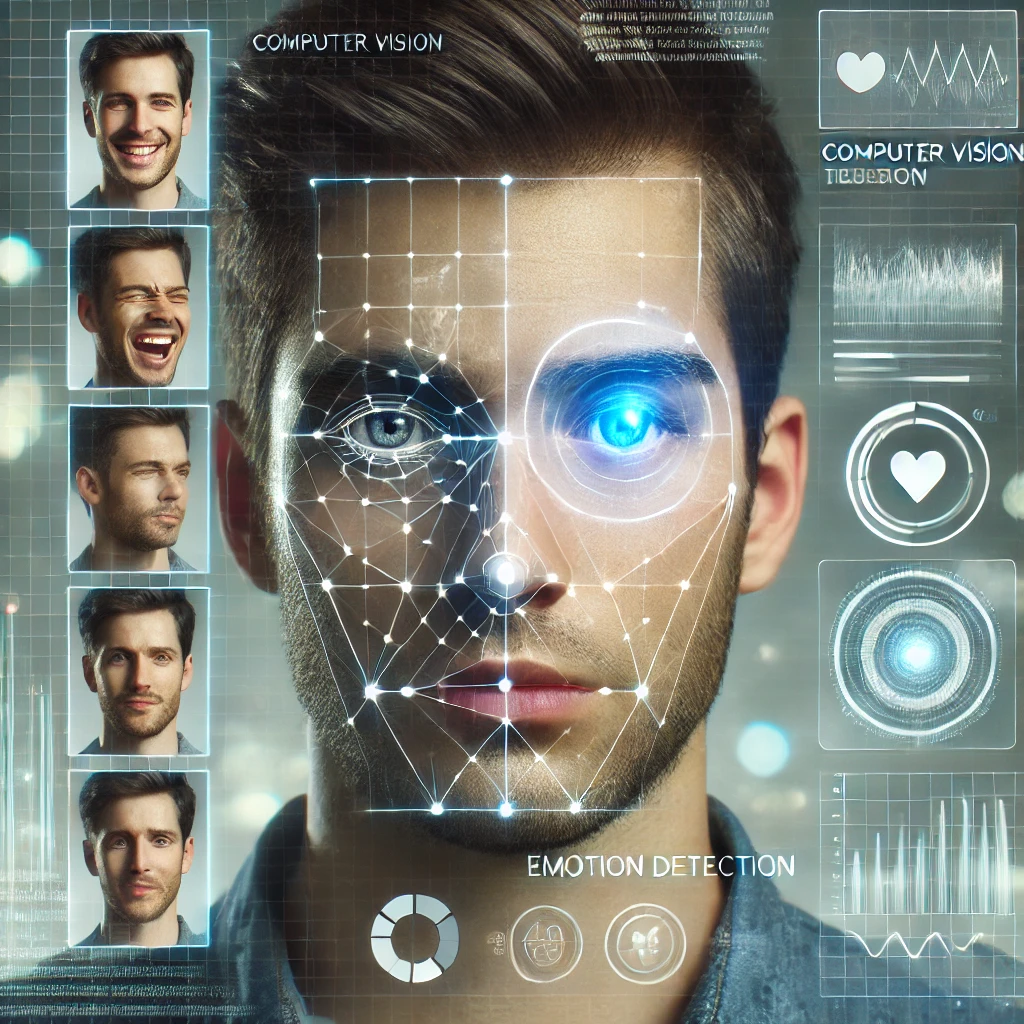

## Importing Libraries for Human Emotion Detection Project

In this section, we import the necessary libraries and modules for building, training, and evaluating our deep learning model for emotion detection. Each library has a specific purpose, contributing to data processing, visualization, model creation, and performance evaluation.

### 1. Core Libraries
- **TensorFlow (`tf`)**: Core deep learning library used to create, train, and deploy machine learning models.
- **NumPy (`np`)**: Fundamental for mathematical operations, including handling arrays and numerical computations.
- **Matplotlib (`plt`)**: Visualization library used for plotting data and results, such as training loss and accuracy curves.
- **Scikit-learn (`sklearn`)**: Provides additional machine learning tools, such as evaluation metrics, which are essential for model assessment.

### 2. Image and Data Processing Libraries
- **OpenCV (`cv2`)**: Computer vision library useful for image processing, augmentation, and preparation tasks.
- **Pillow (`PIL`)**: Image manipulation library for handling images in formats like JPEG and PNG.
- **Albumentations (`A`)**: A popular library for data augmentation, which helps improve model generalization by applying transformations to training images.

### 3. TensorFlow-Specific Imports
- **`tensorflow.keras` Layers, Models, and Utilities**: Modules and layers used to construct custom neural network architectures. Key components include:
  - **Layers**: For building different neural network layers (e.g., `Conv2D`, `Dense`, `Flatten`).
  - **Losses**: Defines loss functions such as `CategoricalCrossentropy` and `SparseCategoricalCrossentropy`.
  - **Metrics**: Includes accuracy and top-K categorical accuracy metrics to evaluate model performance.
  - **Optimizers**: `Adam` is used to update model weights during training.
  - **Callbacks**: Functions such as `EarlyStopping` and `ModelCheckpoint` to enhance and monitor training.

### 4. Visualization and Utility Libraries
- **Seaborn (`sns`)**: Used for creating aesthetically pleasing plots, such as confusion matrices.
- **TensorFlow Datasets (`tfds`)**: A collection of ready-to-use datasets; this may provide datasets for benchmarking.
- **TensorFlow Probability (`tfp`)**: Offers probabilistic tools and layers, useful if adding Bayesian layers or probabilistic approaches to the model.
- **Pathlib and OS**: Utilities for managing file paths and directory operations.
- **Random and Time Modules**: Useful for generating reproducible results (seeding) and measuring processing time.

### 5. Google Colab-Specific Imports
- **`google.colab`**: Functions like `files` and `drive` facilitate file uploads/downloads and Google Drive integration, allowing data storage and model saving directly to Google Drive.

By importing these libraries, we establish a foundation to create and analyze our emotion detection model efficiently. Each library and module plays a vital role, ensuring a smooth and organized workflow from data preparation to model evaluation.


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import cv2
from sklearn.metrics import confusion_matrix, roc_curve
import seaborn as sns
import datetime
import pathlib
import io
import os
import time
import random
from google.colab import files
from PIL import Image
import albumentations as A
import tensorflow_datasets as tfds
import tensorflow_probability as tfp
import matplotlib.cm as cm
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import (GlobalAveragePooling2D, Activation, MaxPooling2D, Add, Conv2D, MaxPool2D, Dense,
                                     Flatten, InputLayer, BatchNormalization, Input, Embedding, Permute,
                                     Dropout, RandomFlip, RandomRotation, LayerNormalization, MultiHeadAttention,
                                     RandomContrast, Rescaling, Resizing, Reshape)
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy,TopKCategoricalAccuracy, CategoricalAccuracy, SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (Callback, CSVLogger, EarlyStopping, LearningRateScheduler,
                                        ModelCheckpoint, ReduceLROnPlateau)
from tensorflow.keras.regularizers  import L2, L1
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Example, Features, Feature
from google.colab import drive

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


 ## Setting Up and Downloading the Dataset

To train our model for emotion detection, we need a well-structured and labeled dataset. In this project, we are using the **Human Emotions Dataset** from Kaggle, which includes annotated images of human faces expressing emotions such as Angry, Happy, and Sad. Below are the steps to set up Kaggle on our environment and download the dataset.

### Steps to Download the Dataset

1. **Install Kaggle and Set Up API Access**:
   - The `kaggle` package allows us to interact with Kaggle directly from our notebook. We begin by installing it using `!pip install -q kaggle`.
   - Then, we create a `.kaggle` directory to store the `kaggle.json` API token file securely.

2. **Configure API Key for Access**:
   - We copy our Kaggle API key (`kaggle.json`) into the `.kaggle` directory and set appropriate permissions using `chmod`. This ensures our Kaggle API key remains secure and enables us to authenticate with Kaggle to access datasets.

3. **Download the Dataset**:
   - Using `kagglehub`, we download the latest version of the "Human Emotions Dataset." This dataset provides labeled images essential for training our model to recognize various human emotions accurately.

4. **Move Dataset to Working Directory**:
   - Finally, we move the downloaded dataset to our working directory for easier access during model training and data preprocessing.



In [ ]:
!pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600/root/.kaggle/kaggle.json

chmod: missing operand after ‘600/root/.kaggle/kaggle.json’
Try 'chmod --help' for more information.


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muhammadhananasghar/human-emotions-datasethes")

print("Path to dataset files:", path)

100%|██████████| 309M/309M [00:16<00:00, 20.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/muhammadhananasghar/human-emotions-datasethes/versions/4


In [ ]:
!mv /root/.cache/kagglehub/datasets/muhammadhananasghar/human-emotions-datasethes/versions/4 /content/


## Loading and Preparing the Emotion Detection Dataset

To begin training our emotion detection model, we need to load and preprocess the image data. TensorFlow’s `image_dataset_from_directory` utility is well-suited for organizing and batching image data from directories, making it convenient for training and validation. Below, we define the directories for training and validation datasets, the emotion classes, and our configuration settings.

### Steps in the Dataset Setup

1. **Define Dataset Directories**:
   - The training and validation directories contain subfolders for each emotion class (`angry`, `happy`, `sad`). These directories are structured to allow TensorFlow to infer labels based on the folder names.

2. **Set Emotion Classes and Configuration**:
   - We specify `CLASS_NAMES`, listing the three emotion categories: **Angry**, **Happy**, and **Sad**.
   - The `CONFIGURATION` dictionary stores key hyperparameters, such as:
     - `IM_SIZE`: Image size for resizing (256x256 pixels).
     - `BATCH_SIZE`: Number of images processed together in each batch (32).
     - `EPOCHS`: Total number of training cycles (10).
     - `LEARNING_RATE`: Step size for model optimization (0.001).

3. **Load and Preprocess the Training Dataset**:
   - Using `image_dataset_from_directory`, we load the training images, setting parameters such as:
     - `labels='inferred'`: Labels are inferred from directory names.
     - `label_mode='int'`: Labels are assigned integer values based on class names.
     - `color_mode='rgb'`: Images are loaded as RGB, maintaining color information.
     - `batch_size` and `image_size` are configured from our settings.
     - `shuffle=True`: Images are shuffled randomly to enhance model training.
     - `seed=99`: A seed for reproducibility.

4. **Load and Preprocess the Validation Dataset**:
   - The validation dataset is loaded similarly to the training dataset, ensuring consistent preprocessing for evaluation purposes.

This setup prepares the data for efficient processing, batching, and shuffling during training, laying the foundation for the model to learn meaningful representations of each emotion.

### Setting Label Mode to Categorical

In our dataset preparation, we set `label_mode='categorical'`. This configuration modifies how labels are assigned to images:

- **Categorical Labels**: With `label_mode='categorical'`, each label is represented as a one-hot encoded vector, rather than as a single integer. For example, for three classes (`angry`, `happy`, `sad`), the labels will be:
  - **Angry**: `[1, 0, 0]`
  - **Happy**: `[0, 1, 0]`
  - **Sad**: `[0, 0, 1]`
- **Benefits**: Categorical labels are beneficial when using multi-class classification models, as they provide the model with clearer, class-specific information for each output neuron.

By setting `label_mode='categorical'`, we ensure our labels are in a format suitable for a softmax output layer in the model, making it easier for the network to learn to differentiate between emotions.



In [ ]:
train_directory = "/content/4/Emotions Dataset/Emotions Dataset/train"
val_directory = "/content/4/Emotions Dataset/Emotions Dataset/test"
CLASS_NAMES = ["angry" , "happy" , "sad"]

CONFIGURATION = {
    "BATCH_SIZE": 32,
    "IM_SIZE": 256,
    "LEARNING_RATE": 1e-3,
    "N_EPOCHS": 20,
    "DROPOUT_RATE": 0.0,
    "REGULARIZATION_RATE": 0.0,
    "N_FILTERS": 6,
    "KERNEL_SIZE": 3,
    "N_STRIDES": 1,
    "POOL_SIZE": 2,
    "N_DENSE_1": 1024,
    "N_DENSE_2": 128,
    "NUM_CLASSES": 3,
    "PATCH_SIZE": 16,
    "PROJ_DIM": 768,
    "CLASS_NAMES": ["angry", "happy", "sad"],
}

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred', # inferred from the directory structure
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"],CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99,
)

Found 6799 files belonging to 3 classes.


In [ ]:
val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_directory,
    labels='inferred', # inferred from the directory structure
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    image_size=(CONFIGURATION["IM_SIZE"],CONFIGURATION["IM_SIZE"]),
    shuffle=True,
    seed=99,
)

Found 2278 files belonging to 3 classes.


## Visualizing a Batch of Training Images

To gain insights into our dataset, we visualize a sample batch of images along with their respective labels. This step helps us verify that the data is correctly loaded, labeled, and formatted, which is essential before model training.

### Visualization Steps

1. **Figure Configuration**:
   - We set up a figure with dimensions `12x12`, creating a large enough canvas to display multiple images clearly.

2. **Iterate Through a Batch of Images**:
   - Using `train_dataset.take(1)`, we fetch one batch of images and labels from the training dataset. This batch will contain 32 images due to our `BATCH_SIZE` setting, but here we display only the first 16 for clarity.

3. **Plotting Each Image**:
   - We loop through the first 16 images in the batch and plot them in a `4x4` grid.
   - **Image Display**: Each image is normalized by dividing pixel values by 255 to scale values to the range `[0,1]`, which improves the visualization.
   - **Title**: The title for each subplot shows the label, extracted by decoding the one-hot encoded vector label using `tf.argmax`.
   - **Axis Off**: We turn off axes for a cleaner look.

This visualization gives us a quick, intuitive understanding of the dataset’s content and ensures that each image corresponds to the expected class label. Proper visualization is crucial, as it helps detect any issues with data loading and labeling early in the process.


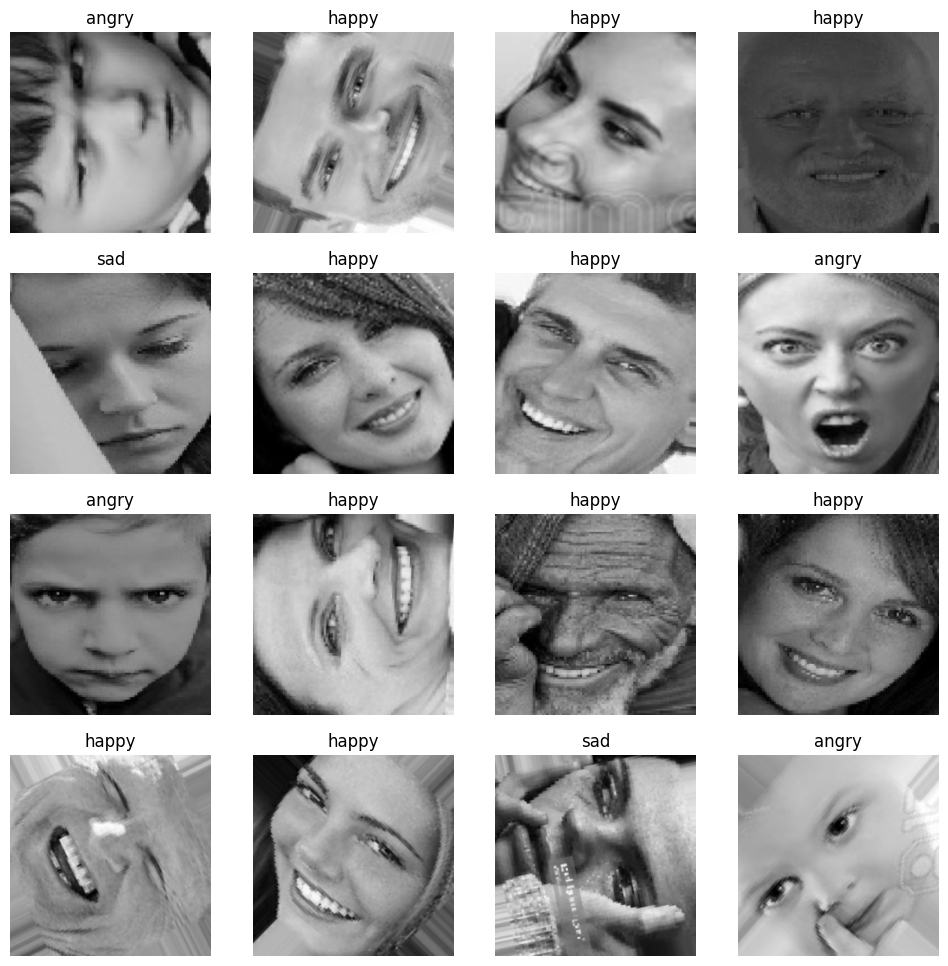

In [ ]:
plt.figure(figsize = (12,12))

for images , labels in train_dataset.take(1):
  for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i]/255)
    plt.title(CLASS_NAMES[tf.argmax(labels[i] , axis=0).numpy()])
    plt.axis("off")

## Optimizing Data Pipeline with Prefetching

To improve the efficiency of our data pipeline, we apply **prefetching** to both the training and validation datasets.

### What is Prefetching?

- **Prefetching** allows the data pipeline to prepare the next batch of images while the current batch is being processed by the model, reducing idle time.
- By overlapping data loading and model execution, prefetching speeds up the training process and makes better use of system resources.

### Implementation Details

- **`buffer_size=tf.data.AUTOTUNE`**: We set the buffer size to `AUTOTUNE`, which allows TensorFlow to automatically choose the optimal buffer size based on available system resources.
- This setting ensures that our data loading process keeps pace with model training, minimizing delays caused by data fetching.

### Why Prefetching is Useful

Prefetching is especially beneficial when training deep learning models on large datasets, as it maximizes data throughput and helps achieve smoother and faster training cycles.

By integrating prefetching, we streamline our data pipeline, making our model training process more efficient and scalable.


In [ ]:
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

## Data Preprocessing: Resizing and Rescaling Layers

In this section, we define a **sequential preprocessing layer** for resizing and rescaling our images. This layer helps standardize the input data, making it suitable for model training.

### Why Resizing and Rescaling?

1. **Resizing**:
   - Each image is resized to a fixed dimension defined by `CONFIGURATION["IM_SIZE"]`, which is set to 256x256 pixels.
   - Resizing ensures that all images have a uniform size, a requirement for feeding data into convolutional neural networks (CNNs), where consistent input dimensions are necessary.

2. **Rescaling**:
   - We rescale pixel values to the range `[0, 1]` by dividing by 255. This normalization process improves model convergence and stability during training, as smaller pixel values make it easier for the model to learn patterns without large numerical variations.

### Implementation

- We use a **`tf.keras.Sequential`** model to stack these layers in a single pipeline:
  - **`Resizing`**: Adjusts each image to the target size (`256x256`).
  - **`Rescaling`**: Normalizes pixel values from `[0, 255]` to `[0, 1]`.

This preprocessing layer will be applied directly to our dataset, allowing us to streamline the input data format and ensure all images are consistently prepared for the model.


In [ ]:
resize_rescale_layers = tf.keras.Sequential([
    Resizing(CONFIGURATION["IM_SIZE"],CONFIGURATION["IM_SIZE"]),
    Rescaling(1./255)
])

## Model Architecture: LeNet-Inspired Convolutional Neural Network

In this section, we build a convolutional neural network (CNN) inspired by the **LeNet** architecture, a classic model initially designed for digit recognition. Our customized version incorporates additional layers and configurations to handle the complexity of emotion detection.

### Model Layers

1. **Input Layer**:
   - We specify an input layer with a shape of `(None, None, 3)` to accept RGB images of varying dimensions. This flexibility allows us to handle different image resolutions within our defined preprocessing pipeline.

2. **Resizing and Rescaling**:
   - We incorporate our `resize_rescale_layers` pipeline to standardize each input to a fixed size (`256x256`) and normalize pixel values to the `[0, 1]` range.

3. **First Convolutional Block**:
   - **Conv2D Layer**: Applies `N_FILTERS` filters with a `KERNEL_SIZE` and `N_STRIDES` strides, extracting features from images. We use `relu` activation and `L2` regularization to improve generalization.
   - **Batch Normalization**: Normalizes activations, stabilizing training and improving convergence speed.
   - **MaxPooling Layer**: Reduces spatial dimensions with a `POOL_SIZE` pool size and doubled strides, enhancing feature invariance.
   - **Dropout Layer**: Introduces dropout to mitigate overfitting by randomly dropping out a fraction (`DROPOUT_RATE`) of neurons during training.

4. **Second Convolutional Block**:
   - **Conv2D Layer**: Applies a greater number of filters (`N_FILTERS * 2 + 4`) to capture more complex patterns.
   - **Batch Normalization** and **MaxPooling**: Follow similar configurations as the first block to continue extracting and reducing features.

5. **Flatten Layer**:
   - Flattens the 2D feature map into a 1D vector, preparing it for the dense (fully connected) layers.

6. **Fully Connected Layers**:
   - **Dense Layer 1**: Consists of `N_DENSE_1` neurons with `relu` activation and `L2` regularization, serving as the primary layer for feature transformation.
   - **Batch Normalization** and **Dropout**: Help reduce overfitting and stabilize activations.
   - **Dense Layer 2**: A secondary dense layer with `N_DENSE_2` neurons to refine the learned features.

7. **Output Layer**:
   - **Dense Layer**: Contains `NUM_CLASSES` neurons (one for each emotion class: angry, happy, sad), with a `softmax` activation for multi-class classification, outputting probabilities for each class.

### Summary
This custom LeNet model is tailored for multi-class emotion detection, incorporating regularization, batch normalization, and dropout to enhance model robustness. The architecture balances simplicity and depth, making it suitable for efficiently learning distinguishing features in emotion recognition.


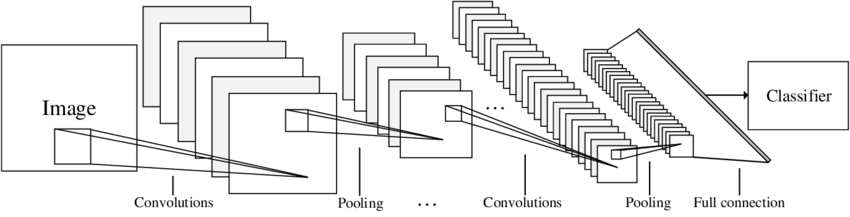

In [ ]:
lenet_model = tf.keras.Sequential(
    [
    InputLayer(input_shape = (None, None, 3), ),

    resize_rescale_layers,

    Conv2D(filters = CONFIGURATION["N_FILTERS"] , kernel_size = CONFIGURATION["KERNEL_SIZE"], strides = CONFIGURATION["N_STRIDES"] , padding='valid',
          activation = 'relu',kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"] ),

    Conv2D(filters = CONFIGURATION["N_FILTERS"]*2 + 4, kernel_size = CONFIGURATION["KERNEL_SIZE"], strides=CONFIGURATION["N_STRIDES"], padding='valid',
          activation = 'relu', kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    MaxPool2D (pool_size = CONFIGURATION["POOL_SIZE"], strides= CONFIGURATION["N_STRIDES"]*2),

    Flatten(),

    Dense( CONFIGURATION["N_DENSE_1"], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),
    Dropout(rate = CONFIGURATION["DROPOUT_RATE"]),

    Dense( CONFIGURATION['N_DENSE_2'], activation = "relu", kernel_regularizer = L2(CONFIGURATION["REGULARIZATION_RATE"])),
    BatchNormalization(),

    Dense(CONFIGURATION["NUM_CLASSES"], activation = "softmax"),

])

lenet_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 6)         │             168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 6)         │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 127, 127, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 16)        │             880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 61504)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      62,981,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 63,118,451 (240.78 MB)

 Trainable params: 63,116,103 (240.77 MB)

 Non-trainable params: 2,348 (9.17 KB)

## Loss Function: Categorical Crossentropy

To optimize our model during training, we use the **Categorical Crossentropy** loss function. This function is well-suited for multi-class classification problems where the goal is to predict a single class out of multiple possible categories.

### Why Categorical Crossentropy?

1. **Multi-Class Classification**:
   - Our model predicts one of three emotion classes (`angry`, `happy`, `sad`), and Categorical Crossentropy is designed to evaluate the difference between the predicted probability distribution and the true distribution across these classes.

2. **Label Mode**:
   - Since we configured our labels as **categorical** (one-hot encoded vectors), `CategoricalCrossentropy` is the appropriate choice. If our labels were integers (class indices), we would instead use **`SparseCategoricalCrossentropy`**.

3. **From Logits**:
   - Here, `from_logits=False` specifies that the model outputs probabilities (after applying `softmax` in the final layer), making this configuration compatible with our chosen output format.

### How Categorical Crossentropy Works

This loss function calculates the negative log-likelihood of the correct class, encouraging the model to assign higher probabilities to the correct classes during training. Minimizing this loss guides the model to make accurate predictions.

By choosing `CategoricalCrossentropy`, we ensure that the model is effectively penalized when it predicts incorrect classes, which helps improve its classification accuracy over time.


In [ ]:
loss_function = CategoricalCrossentropy(from_logits = False) # if the label mode was int , we will use SparseCategoricalCrossentropy

## Evaluation Metrics: Categorical Accuracy and Top-K Accuracy

To evaluate our model's performance on the emotion detection task, we employ two metrics: **Categorical Accuracy** and **Top-K Categorical Accuracy**. These metrics provide insight into how well our model classifies emotions and allow us to monitor both standard accuracy and a more flexible measure of correctness.

### 1. Categorical Accuracy
- **Definition**: Categorical Accuracy computes the percentage of predictions where the model's highest probability class matches the true label.
- **Purpose**: This metric is the most intuitive measure of performance, as it indicates the proportion of correctly classified images.
- **Usage**: We use `CategoricalAccuracy` here because our labels are one-hot encoded, making it well-suited for multi-class classification tasks like emotion detection.

### 2. Top-K Categorical Accuracy (Top-2 Accuracy)
- **Definition**: Top-K Accuracy measures whether the true label is within the top K predicted classes. In our case, we set `k=2`, so the model is correct if the actual class appears in the top two predictions.
- **Purpose**: In multi-class classification, especially in challenging tasks, `Top-K` accuracy provides a more forgiving measure that accounts for cases where the model’s second most confident prediction may still be correct. This metric is helpful for understanding how well the model generalizes.
  
Using both metrics allows us to gauge the model's accuracy on exact matches (categorical accuracy) and its ability to capture relevant options in a broader sense (top-2 accuracy). This dual perspective offers a more comprehensive view of the model’s classification performance.


In [ ]:
metrics = [CategoricalAccuracy(name = "accuracy") , TopKCategoricalAccuracy(k=2 , name = "top_k_accuracy")]

## Model Compilation

To train our emotion detection model, we need to compile it by defining the optimizer, loss function, and evaluation metrics. This step configures the model's training process and determines how it will learn and evaluate its performance.

### Components of Model Compilation

1. **Optimizer: Adam**
   - **Selected Optimizer**: We use the **Adam** optimizer, a popular choice in deep learning due to its adaptive learning rate and efficiency with large datasets.
   - **Learning Rate**: We set the learning rate to the value specified in `CONFIGURATION["LEARNING_RATE"]`, controlling how much the model adjusts weights with each step.
   - **Purpose**: Adam combines the advantages of two other optimizers—AdaGrad and RMSProp—making it well-suited for a wide range of tasks, including image classification.

2. **Loss Function: Categorical Crossentropy**
   - We use **Categorical Crossentropy**, which calculates the error between the true and predicted class distributions for multi-class classification.
   - This loss function encourages the model to assign high probability to the correct class, minimizing the error during training.

3. **Metrics**
   - **Categorical Accuracy**: Provides the standard measure of how often the model's predictions match the true labels.
   - **Top-K Accuracy**: In our case, Top-2 accuracy gives insight into how often the correct label appears among the model's top two predictions. This is helpful for understanding the model’s performance more broadly in a challenging classification task.

By compiling the model with this configuration, we set it up for efficient training, enabling it to learn from the data and optimize its parameters based on the specified loss and metrics.


In [ ]:
lenet_model.compile(optimizer = Adam(learning_rate = CONFIGURATION["LEARNING_RATE"]), loss = loss_function, metrics = metrics)

### Training the Model

In this step, we initiate the training process for our `lenet_model` using the `.fit()` method. Here's a breakdown of the parameters used:

- **`train_dataset`**: The dataset containing our training images and their respective labels. This dataset has been prepared with augmentations, resizing, and rescaling to ensure that our model can generalize well to new data.
  
- **`validation_data=val_dataset`**: The validation dataset is used to evaluate the model's performance after each epoch without influencing the training process. This dataset allows us to track whether the model is learning well and not overfitting to the training data.
  
- **`epochs=CONFIGURATION["N_EPOCHS"]`**: This specifies the number of times the model will iterate over the entire training dataset. Each epoch consists of a forward and backward pass for every batch of training data, allowing the model to progressively learn the dataset's patterns.
  
- **`verbose=1`**: Controls the verbosity of the output during training. Setting it to 1 provides a detailed, per-epoch summary of training and validation metrics.

During training, the model will output metrics such as accuracy, loss, and top-k accuracy (since we specified `top_k_accuracy` in `metrics`). These values help us monitor how well the model is performing on both training and validation data, allowing us to make adjustments if necessary.

By the end of training, we aim to have a well-generalized model that performs consistently on unseen data.


In [ ]:
history = lenet_model.fit(train_dataset, validation_data = val_dataset, epochs = CONFIGURATION["N_EPOCHS"] , verbose = 1)

Epoch 1/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.5215 - loss: 1.1307 - top_k_accuracy: 0.8113 - val_accuracy: 0.4241 - val_loss: 1.1971 - val_top_k_accuracy: 0.7739
Epoch 2/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.7187 - loss: 0.6498 - top_k_accuracy: 0.9153 - val_accuracy: 0.4504 - val_loss: 1.1185 - val_top_k_accuracy: 0.8613
Epoch 3/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.8483 - loss: 0.3928 - top_k_accuracy: 0.9651 - val_accuracy: 0.5874 - val_loss: 1.0761 - val_top_k_accuracy: 0.8758
Epoch 4/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9057 - loss: 0.2724 - top_k_accuracy: 0.9828 - val_accuracy: 0.7024 - val_loss: 0.7898 - val_top_k_accuracy: 0.8837
Epoch 5/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9282 - loss: 0.2207 - top_k_accuracy: 0.9882 - val_accuracy: 0.5733 - val_loss: 1.4091 - val_top_k_accuracy: 0.8376
Epoch 6/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.9442 - loss: 0.15

### Training Analysis and Potential Solutions

#### 1. **Training Accuracy vs. Validation Accuracy Fluctuations**

- **Observation**:
  - The training accuracy increases steadily over epochs, showing that the model is learning from the training data.
  - However, the validation accuracy fluctuates, indicating that the model's generalization to unseen data is inconsistent.

- **Potential Causes**:
  - **Overfitting**: The model might be memorizing the training data rather than learning generalized patterns, as indicated by the increasing training accuracy and fluctuating validation accuracy.
  - **Lack of Regularization**: Since the dropout rate and regularization rate are set to 0.0, the model has no mechanisms to prevent overfitting.
  - **Insufficient Data Augmentation**: The model might not be exposed to enough variation in the data during training, making it more likely to overfit.

- **Potential Solutions**:
  - **Introduce Regularization**: Increase the dropout rate or apply L2 regularization. Adding dropout, for instance, would randomly set some neurons to zero during training, forcing the model to learn more robust features.
  - **Data Augmentation**: Introduce image augmentation techniques like rotation, flipping, and color jittering to make the model more robust to variations in the input data and prevent overfitting.
  - **Early Stopping**: Implement early stopping during training to halt the process if the validation accuracy does not improve after a certain number of epochs. This will prevent the model from training too long and overfitting.
  - **Cross-validation**: Use cross-validation to better assess how well the model generalizes to unseen data, ensuring that the model's performance is not just the result of a lucky train-test split.

#### 2. **Validation Loss Not Decreasing as Expected**

- **Observation**:
  - Validation loss does not decrease consistently, even though the training loss improves.
  - This could be another indication of overfitting or that the model has not yet learned to generalize properly.

- **Potential Causes**:
  - **Model Complexity**: The model might be too complex for the available data, especially with a large number of parameters in dense layers (e.g., `N_DENSE_1` = 1024). This complexity could lead to overfitting.
  - **Hyperparameter Settings**: The current learning rate and other hyperparameters might not be optimal for the dataset.

- **Potential Solutions**:
  - **Simplify the Model**: Reduce the complexity of the model by decreasing the number of neurons in the dense layers (`N_DENSE_1`, `N_DENSE_2`) and filters in convolutional layers (`N_FILTERS`). This could prevent overfitting and improve generalization.
  - **Tune Learning Rate**: Lower the learning rate and monitor how the model's performance evolves. Sometimes, a smaller learning rate can result in smoother convergence and better validation performance.
  - **Increase Epochs**: Train the model for a few more epochs to see if the validation loss continues to decrease. Sometimes, a longer training period can help the model learn better, especially with small learning rates.

#### 3. **Model Evaluation Metrics**

- **Observation**:
  - The model provides both accuracy and top-k accuracy metrics. While accuracy is a standard metric, top-k accuracy can help when the correct label isn't necessarily the top prediction.
  - If the top-1 accuracy is low, but the top-3 or top-5 accuracy is high, it suggests the model might still be making reasonable predictions even if it's not perfect in the first prediction.

- **Potential Causes**:
  - **Class Imbalance**: If the dataset has an imbalance in the number of samples for each class (e.g., more "happy" than "angry"), the model may find it easier to predict the majority class, leading to biased results.
  - **Inadequate Evaluation Metrics**: Accuracy alone may not be sufficient for evaluating the model's performance, especially in imbalanced datasets.

- **Potential Solutions**:
  - **Class Weights**: Apply class weights to address class imbalance. This gives more importance to underrepresented classes during training, helping the model learn to classify all classes more accurately.
  - **Use Other Metrics**: Include additional evaluation metrics like Precision, Recall, and F1-score, which give more detailed insights into the model’s performance, especially on imbalanced datasets.
  - **Analyze Confusion Matrix**: Generate a confusion matrix to visually inspect the model's performance and identify which classes it has trouble predicting.

#### 4. **Dropout and Regularization**

- **Observation**:
  - The dropout rate and regularization rate are both set to 0.0, meaning the model doesn't have any built-in mechanisms to prevent overfitting.

- **Potential Causes**:
  - **Overfitting**: Without dropout or other regularization techniques, the model might be too prone to overfitting, especially with deep networks and relatively small datasets.
  
- **Potential Solutions**:
  - **Increase Dropout Rate**: Set a dropout rate between 0.2 and 0.5 in the convolutional and dense layers to prevent the model from relying too much on any particular neuron during training.
  - **L2 Regularization**: Add L2 regularization (weight decay) to the convolutional or dense layers to penalize large weights and encourage the model to learn more generalizable patterns.

---

### Conclusion

In summary, the model shows promising signs of learning but also exhibits overfitting and generalization issues, as evidenced by the fluctuating validation accuracy and inconsistent loss trends. To address these challenges, it's crucial to incorporate regularization techniques, reduce model complexity, and introduce data augmentation. Additionally, monitoring other evaluation metrics and tuning the hyperparameters will further enhance the model's performance on unseen data. By implementing these improvements, you should see more consistent results and better generalization to new, unseen data.


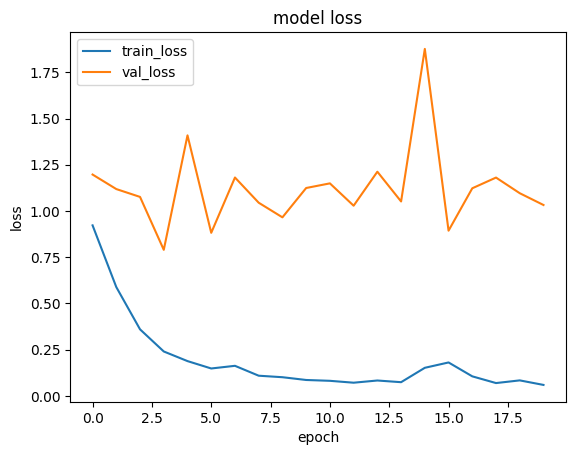

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left')
plt.show()

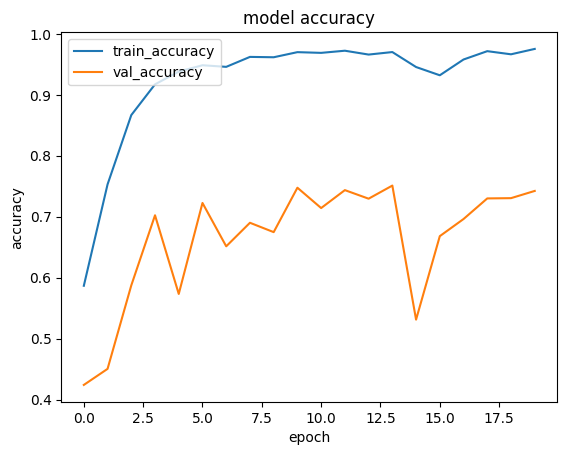

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'], loc='upper left')
plt.show()

## Model Evaluation

In this step, we evaluate the performance of the trained LeNet model on the validation dataset. The `evaluate()` function in Keras computes the loss and any specified metrics for the model using the provided dataset.


In [ ]:
lenet_model.evaluate(val_dataset)

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7277 - loss: 1.1339 - top_k_accuracy: 0.8944


[1.0323851108551025, 0.742317795753479, 0.9060579538345337]

In [ ]:
test_image = cv2.imread("/content/4/Emotions Dataset/Emotions Dataset/test/happy/520857.jpg")
im = tf.constant(test_image , dtype = tf.float32)
im = tf.expand_dims(im , axis = 0)
print(lenet_model(im))
print(CLASS_NAMES[tf.argmax(lenet_model(im) , axis = 1).numpy()[0]])

tf.Tensor([[6.3493434e-07 9.9982518e-01 1.7427234e-04]], shape=(1, 3), dtype=float32)
happy


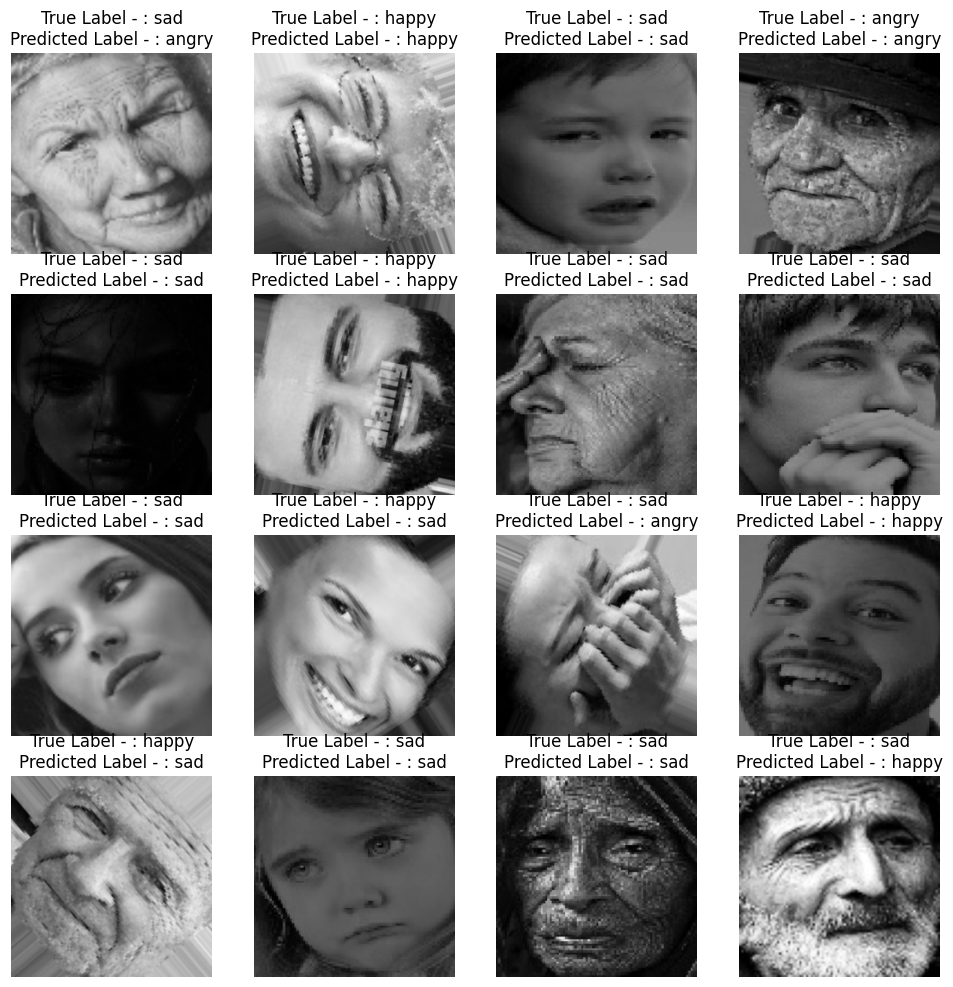

In [ ]:
plt.figure(figsize = (12,12))

for images , labels in val_dataset.take(1):
  for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i]/255)
    plt.title("True Label - : " + CLASS_NAMES[tf.argmax(labels[i] , axis = 0).numpy()] + "\n" + "Predicted Label - : " + CLASS_NAMES[tf.argmax(lenet_model(tf.expand_dims(images[i],axis=0)) , axis = 1).numpy()[0]])
    plt.axis("off")

### Generating and Evaluating Model Predictions Using Confusion Matrix Visualization

This section iterates over the validation dataset to gather model predictions and true labels, processes them for evaluation, and ultimately generates a confusion matrix to visualize the performance of the human emotion detection model. This approach enables a detailed examination of the model's predictive accuracy across different emotion classes, aiding in understanding specific strengths and weaknesses.


1.  **Initialize Prediction and Label Storage**:The lists predicted and labels are initialized to store model predictions and actual labels. This setup organizes predictions alongside ground truth labels, essential for batch evaluation and metrics computation.
    
2.  **Collect Model Predictions and True Labels**:The loop for im, label in val\_dataset iterates over each image and label pair in the validation dataset. Within the loop, predicted.append(lenet\_model(im)) adds the model’s prediction for each image, and labels.append(label.numpy()) stores the corresponding true label, ensuring alignment for comparison.
    
3.  **Concatenate and Process Labels**:print(np.concatenate(\[np.argmax(labels\[:-1\], axis=-1).flatten(), np.argmax(labels\[-1\], axis=-1).flatten()\])) flattens and concatenates all but the last set of true labels, along with the final label, into a single list. This simplifies the dataset, making it easier to calculate metrics on the complete validation set.
    
4.  **Concatenate and Process Predictions**:Similarly, print(np.concatenate(\[np.argmax(predicted\[:-1\], axis=-1).flatten(), np.argmax(predicted\[-1\], axis=-1).flatten()\])) applies the same flattening and concatenation process to the predicted values. This makes the predicted values directly comparable to the actual labels.
    
5.  **Prepare Data for Confusion Matrix**:The variables pred and label store flattened arrays of the predicted and true labels, respectively, by computing the most probable class index in each prediction (np.argmax) and flattening the results. This transformation aligns the data format for generating a confusion matrix.
    
6.  **Compute and Display the Confusion Matrix**:cm = confusion\_matrix(label, pred) computes the confusion matrix using the true labels and predicted labels, which quantifies the model’s performance by counting correct and incorrect predictions for each class.
    
7.  **Visualize the Confusion Matrix**:The final section visualizes the confusion matrix using a heatmap:
    
    *   plt.figure(figsize=(10,10)) adjusts the display size for readability.
        
    *   sns.heatmap(cm, annot=True, fmt='d') creates an annotated heatmap to display counts in each cell, where rows represent actual classes and columns represent predicted classes.
        
    *   Labels are set for both axes, and a title is added with plt.title("Confusion Matrix"), clarifying the matrix as a performance summary.
        
    *   plt.show() displays the plot, providing a visual summary of prediction accuracy across emotion categories.

In [ ]:
predicted = []
labels = []
for im , label in val_dataset :
  predicted.append(lenet_model(im))
  labels.append(label.numpy())

In [ ]:
print(np.concatenate([np.argmax(labels[:-1] , axis =-1).flatten(),np.argmax(labels[-1] , axis =-1).flatten()]))
print(np.concatenate([np.argmax(predicted[:-1] , axis =-1).flatten(),np.argmax(predicted[-1] , axis =-1).flatten()]))

In this code, \[:-1\] is a slicing operation that excludes the last element of the list. Here’s why it’s used in this context:

1.  **General Purpose**:\[:-1\] takes all elements from the start of the list up to, but not including, the last element. This technique is often used to process data in batches, keeping the last element separate for specific handling.
    
2.  **Specific Use in This Code**:In this case, both labels\[:-1\] and predicted\[:-1\] are sliced to exclude the last element of each list before concatenating with the last element separately. This is likely done to handle the last batch individually (perhaps because of different dimensions or batch sizes for the last elements on the last batch), ensuring consistent formatting across the concatenated list.
    
3.  **Flattening and Concatenating for Uniformity**:By separating out the last element (labels\[-1\] and predicted\[-1\]) and concatenating it back after flattening, the code ensures that each batch, including the final one, has a uniform shape and is correctly aligned for evaluation in the confusion matrix.

In [ ]:
pred = np.argmax(predicted[:-1] , axis =-1).flatten()
label = np.argmax(labels[:-1] , axis =-1).flatten()

In [ ]:
cm = confusion_matrix(label , pred)
print(cm)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion Matrix")
plt.show()

## Integrating Data Augmentation for Enhanced Training with LeNet Model

**Overview**:To improve the LeNet model’s robustness and generalization, data augmentation is introduced in the training process. Augmentation techniques simulate natural variations in data, allowing the model to learn from a more diverse set of examples. This approach is crucial in emotion detection, as it helps the model become resilient to variations like slight rotations, mirror images, and contrast changes. Reapplying the LeNet model with augmented data prepares it to handle real-world complexities more effectively.Additionally, the model will be initialized and compiled with the same loss function and evaluation metrics as before, ensuring consistency in performance tracking.

**Data Preparation with Augmentation**:

1.  **Augmentation Layer Definition**:A series of augmentation layers are created to introduce variations during training. These layers include:
    
    *   _Random Rotation_: This introduces slight rotational shifts in the images, allowing the model to recognize emotions regardless of minor head tilts.
        
    *   _Random Horizontal Flip_: This simulates mirrored images, helping the model generalize across left and right facial orientations.
        
    *   _Random Contrast Adjustment_: Modifying contrast simulates different lighting conditions, making the model less sensitive to variations in brightness.
        
2.  **Applying Augmentation During Training**:An augmentation function wraps these transformations, ensuring they are applied dynamically during training. Each image is modified differently in each epoch, exposing the model to varied examples without altering the dataset size.
    
3.  **Efficient Data Loading and Prefetching**:The augmented training dataset uses parallel mapping and prefetching to streamline data loading. Prefetching allows data to be loaded asynchronously, minimizing waiting time for the model during training, which accelerates the training process.
    
4.  **Validation Dataset Preparation**:For the validation dataset, prefetching is also enabled for efficiency, but no augmentation is applied. This ensures that validation accuracy is evaluated on unaltered images, providing a realistic measure of model performance.
    

This approach makes the LeNet model more adaptable, equipping it to detect emotions in diverse and unpredictable conditions it may encounter in real-world applications.

In [ ]:
### tf.keras.layer augment
augment_layers = tf.keras.Sequential([
  RandomRotation(factor = (-0.025, 0.025)),
  RandomFlip(mode='horizontal',),
  RandomContrast(factor=0.1),
])

def augment_layer(image ,label):
  return augment_layers(image , training = True) , label

In the data augmentation layer, the parameter factor=(-0.025, 0.025) in RandomRotation specifies the range of rotation angles that can be randomly applied to each image. Here’s a detailed breakdown:

1.  This means each image can be randomly rotated by an angle between -9 and +9 degrees.
    
    *   \-0.025 \* 360 gives approximately -9 degrees, which is the lower bound.
        
    *   0.025 \* 360 gives approximately 9 degrees, which is the upper bound.
        
2.  **Purpose of Small Rotation**:Slight rotations help the model generalize by simulating minor head tilts or small changes in camera angle. This is particularly useful for emotion detection, where expressions may be presented from slightly different angles. By training the model with subtle rotations, it learns to recognize emotions even when faces are not perfectly aligned, making it more robust to real-world variations.
    
3.  **Controlled Range**:The small range of -9 to +9 degrees is chosen to avoid excessive distortion, which might make images unrealistic or difficult for the model to interpret. This range strikes a balance, introducing enough variation for generalization while maintaining the essential features necessary for emotion detection.
    

In summary, factor=(-0.025, 0.025) provides subtle and realistic rotations that improve the model’s adaptability without altering facial features significantly.

In [ ]:
training_dataset_augment = (
    train_dataset
    .map(augment_layer , num_parallel_calls = tf.data.AUTOTUNE)
    .prefetch(tf.data.AUTOTUNE)
)

In [ ]:
validation_dataset = (
    val_dataset
    .prefetch(tf.data.AUTOTUNE)
)

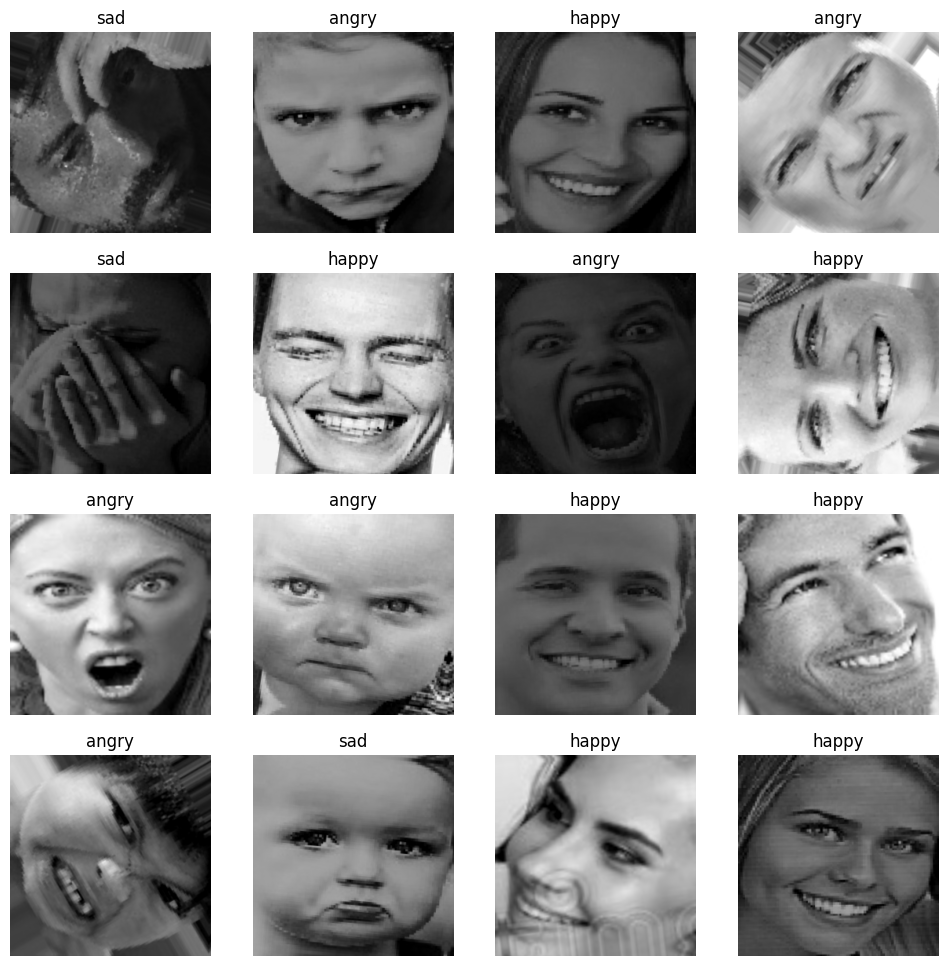

In [ ]:
plt.figure(figsize = (12,12))

for images , labels in training_dataset_augment.take(1):
  for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(images[i]/255)
    plt.title(CLASS_NAMES[tf.argmax(labels[i] , axis=0).numpy()])
    plt.axis("off")

In [ ]:
history = lenet_model.fit(training_dataset_augment, validation_data = validation_dataset, epochs = CONFIGURATION["N_EPOCHS"] , verbose = 1)

Epoch 1/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 25s 76ms/step - accuracy: 0.5071 - loss: 1.1931 - top_k_accuracy: 0.7901 - val_accuracy: 0.4017 - val_loss: 1.1078 - val_top_k_accuracy: 0.8169
Epoch 2/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.6424 - loss: 0.7975 - top_k_accuracy: 0.8741 - val_accuracy: 0.4737 - val_loss: 1.0799 - val_top_k_accuracy: 0.7801
Epoch 3/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.6941 - loss: 0.7119 - top_k_accuracy: 0.9022 - val_accuracy: 0.6607 - val_loss: 0.7944 - val_top_k_accuracy: 0.8718
Epoch 4/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.7255 - loss: 0.6457 - top_k_accuracy: 0.9120 - val_accuracy: 0.3332 - val_loss: 2.0631 - val_top_k_accuracy: 0.6049
Epoch 5/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.7430 - loss: 0.6176 - top_k_accuracy: 0.9204 - val_accuracy: 0.6747 - val_loss: 0.7685 - val_top_k_accuracy: 0.8885
Epoch 6/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.7847 - loss:

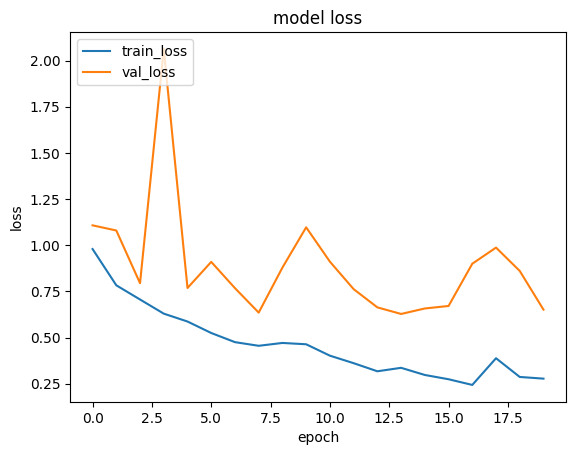

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left')
plt.show()

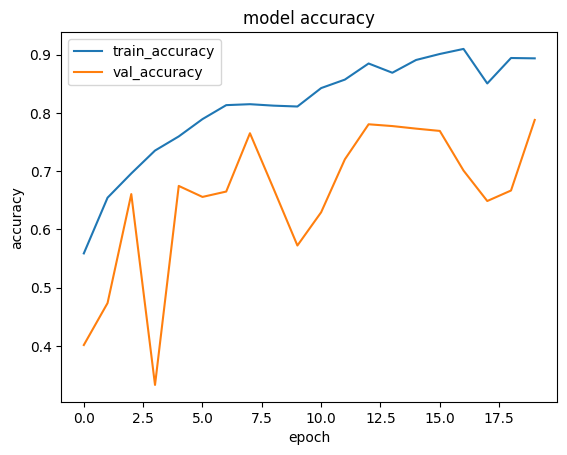

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'], loc='upper left')
plt.show()

**Analysis of Model Performance with and without Data Augmentation**

**Baseline (No Augmentation)**:

*   The model achieved high training accuracy and low loss, with _accuracy: 0.9748_, _loss: 0.0626_, and a top-k accuracy close to 1.
    
*   Validation performance, however, showed a noticeable gap, with _val\_accuracy: 0.7423_ and a significantly higher _val\_loss: 1.0324_, suggesting some overfitting. This gap indicates that while the model performed well on the training data, it struggled to generalize to unseen validation samples.
    

**With Data Augmentation**:

*   Training on augmented data provided more realistic conditions by introducing slight variations in each sample, increasing training time due to the added transformations.
    
*   The final augmented training results were lower in both accuracy and top-k accuracy than the baseline, with _accuracy: 0.8893_ and _top\_k\_accuracy: 0.9733_. However, the model’s _val\_accuracy: 0.7880_ improved, and _val\_loss: 0.6513_ dropped compared to the baseline. This improvement suggests that the augmented model generalizes better, as reflected by a more balanced performance between training and validation.
    

**Conclusions**:

*   Data augmentation led to a trade-off in training accuracy for improved validation performance, reducing overfitting and enhancing generalization.
    
*   Although the model trained on augmented data didn’t achieve the same peak accuracy as the baseline, the improvement in validation metrics suggests it’s better suited for real-world applications, as it’s less likely to overfit on the training set and is better at handling data variations.

## CutMix Data Augmentation Technique

In this section, we apply the CutMix augmentation strategy to create composite images by merging sections of two distinct images and combining their labels in a weighted fashion. CutMix is especially useful for increasing model robustness, as it enables the model to generalize better by seeing various combinations of image features and associated labels.

**1\. Box Function**The box function calculates the bounding box (a rectangular region) on an image where the mixing will occur. Here’s how it operates:

*   A random center position, (r\_x, r\_y), is selected for the box within the image’s dimensions.
    
*   The width r\_w and height r\_h of the box are derived using the CutMix parameter lambda, which is sampled from a Beta distribution. This lambda controls the proportion of the second image mixed into the first.
    
*   The bounding box is then adjusted and constrained to fit within the image dimensions, ensuring the crop doesn’t exceed boundaries.
    

**2\. CutMix Function**In the cutmix function, two images (and their labels) are combined to form a new augmented image.

*   **Sampling Lambda**: A lambda value is sampled, controlling the proportion of each image in the mix. High values of lambda mean more of the first image is retained, while lower values mean more of the second image is incorporated.
    
*   **Bounding Box Cropping and Padding**: Based on the box coordinates from the box function:
    
    *   A section of image\_2 is cropped and then padded to the same spatial location on image\_1.
        
    *   This generates image, a composite image, where a portion of image\_2 is blended into image\_1.
        
*   **Label Mixing**: The label for the resulting image is a weighted sum of label\_1 and label\_2, based on the proportion of each image’s area in the final composite. The lambda value is recalculated to reflect this proportion, ensuring the labels accurately represent the mix.
    

**Purpose**This CutMix augmentation is designed to expose the model to varied representations by blending features from multiple images. It reduces overfitting and enhances generalization by teaching the model to focus on diverse regions, improving its resilience to variations in the data.

In [ ]:
def box(lamda):

  r_x = tf.cast(tfp.distributions.Uniform(0, CONFIGURATION["IM_SIZE"]).sample(1)[0], dtype = tf.int32)
  r_y = tf.cast(tfp.distributions.Uniform(0, CONFIGURATION["IM_SIZE"]).sample(1)[0], dtype = tf.int32)

  r_w = tf.cast(CONFIGURATION["IM_SIZE"]*tf.math.sqrt(1-lamda), dtype = tf.int32)
  r_h = tf.cast(CONFIGURATION["IM_SIZE"]*tf.math.sqrt(1-lamda), dtype = tf.int32)

  r_x = tf.clip_by_value(r_x - r_w//2, 0, CONFIGURATION["IM_SIZE"])
  r_y = tf.clip_by_value(r_y - r_h//2, 0, CONFIGURATION["IM_SIZE"])

  x_b_r = tf.clip_by_value(r_x + r_w//2, 0, CONFIGURATION["IM_SIZE"])
  y_b_r = tf.clip_by_value(r_y + r_h//2, 0, CONFIGURATION["IM_SIZE"])

  r_w = x_b_r - r_x
  if(r_w == 0):
    r_w  = 1

  r_h = y_b_r - r_y
  if(r_h == 0):
    r_h = 1

  return r_y, r_x, r_h, r_w

In [ ]:
def cutmix(train_dataset_1, train_dataset_2):
  (image_1,label_1), (image_2, label_2) = train_dataset_1, train_dataset_2

  lamda = tfp.distributions.Beta(2,2)
  lamda = lamda.sample(1)[0]

  r_y, r_x, r_h, r_w = box(lamda)
  crop_2 = tf.image.crop_to_bounding_box(image_2, r_y, r_x, r_h, r_w)
  pad_2 = tf.image.pad_to_bounding_box(crop_2, r_y, r_x, CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"])

  crop_1 = tf.image.crop_to_bounding_box(image_1, r_y, r_x, r_h, r_w)
  pad_1 = tf.image.pad_to_bounding_box(crop_1, r_y, r_x, CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"])

  image = image_1 - pad_1 + pad_2

  lamda = tf.cast(1- (r_w*r_h)/(CONFIGURATION["IM_SIZE"]*CONFIGURATION["IM_SIZE"]), dtype = tf.float32)
  label = lamda*tf.cast(label_1, dtype = tf.float32) + (1-lamda)*tf.cast(label_2, dtype = tf.float32)

  return image, label

### Implementation of CutMix Augmentation on the Training Dataset

To apply the CutMix augmentation effectively, we create a dataset where each example consists of pairs of augmented images. This setup allows the model to learn from blended representations, enhancing its ability to generalize.

**1\. Dataset Preparation with Augmentation Layers**
The datasets training\_dataset\_cutmix\_1 and training\_dataset\_cutmix\_2 are created by applying predefined augmentation layers (from augment\_layer) to the original train\_dataset. These augmentations, such as random rotations, flips, and contrast adjustments, provide a varied representation of each image, aiding model robustness.

**2\. Pairing Augmented Datasets for CutMix Application**
Using tf.data.Dataset.zip, we combine training\_dataset\_cutmix\_1 and training\_dataset\_cutmix\_2 into a single dataset, mixed\_dataset\_cutmix, where each entry is a pair of augmented images. These pairs are essential for the CutMix function, as it operates by blending two images at each training step.

**3\. Applying CutMix and Prefetching**
The cutmix function is mapped to mixed\_dataset\_cutmix, producing training\_dataset\_cutmix, where each image-label pair is a result of CutMix blending. Using tf.data.AUTOTUNE for parallel calls and prefetching optimizes data loading and processing, ensuring that augmented data is efficiently fed into the model during training.

**Purpose** This approach not only increases the variety in the training data through augmentation but also leverages CutMix to introduce even more complex variations. As a result, the model is exposed to a greater range of feature combinations, helping it learn more generalized patterns and perform better on unseen data.

In [ ]:
training_dataset_cutmix_1 = train_dataset.map(augment_layer,num_parallel_calls = tf.data.AUTOTUNE)
training_dataset_cutmix_2 = train_dataset.map(augment_layer,num_parallel_calls = tf.data.AUTOTUNE)


mixed_dataset_cutmix = tf.data.Dataset.zip((training_dataset_cutmix_1, training_dataset_cutmix_2))

In [ ]:
training_dataset_cutmix = (
    mixed_dataset_cutmix
    .map(cutmix, num_parallel_calls = tf.data.AUTOTUNE)
    .prefetch(tf.data.AUTOTUNE)
)

In [ ]:
history = lenet_model.fit(training_dataset_cutmix, validation_data = validation_dataset, epochs = CONFIGURATION["N_EPOCHS"] , verbose = 1)

Epoch 1/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.7631 - loss: 0.7950 - top_k_accuracy: 0.9359 - val_accuracy: 0.6901 - val_loss: 0.7357 - val_top_k_accuracy: 0.9012
Epoch 2/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.8190 - loss: 0.6431 - top_k_accuracy: 0.9510 - val_accuracy: 0.7766 - val_loss: 0.5539 - val_top_k_accuracy: 0.9350
Epoch 3/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 20s 88ms/step - accuracy: 0.7677 - loss: 0.6974 - top_k_accuracy: 0.9326 - val_accuracy: 0.7410 - val_loss: 0.6143 - val_top_k_accuracy: 0.9170
Epoch 4/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.7530 - loss: 0.7081 - top_k_accuracy: 0.9364 - val_accuracy: 0.5123 - val_loss: 1.0911 - val_top_k_accuracy: 0.8358
Epoch 5/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.7590 - loss: 0.6962 - top_k_accuracy: 0.9391 - val_accuracy: 0.5891 - val_loss: 0.9594 - val_top_k_accuracy: 0.8635
Epoch 6/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 20s 89ms/step - accuracy: 0.8042 - loss:

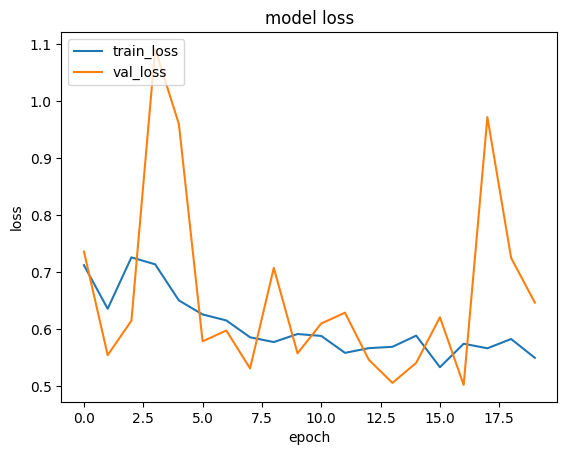

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'], loc='upper left')
plt.show()

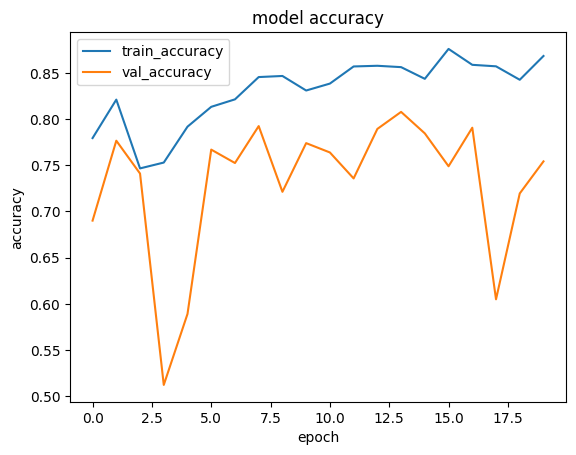

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'], loc='upper left')
plt.show()

**Observations and Analysis of CutMix Augmentation Results**

The CutMix augmentation approach yielded interesting training results, as follows:

1.  **Model Performance**
    
    *   Training Accuracy: The model consistently achieved around 84-87% accuracy during training, with minor fluctuations across epochs.
        
    *   Validation Accuracy: Validation accuracy improved significantly, reaching up to 80.77% at its peak (Epoch 14). This is notably higher than the results from the original training without CutMix augmentation.
        
2.  **Top-K Accuracy**
    
    *   Top-K accuracy for both training and validation remained strong, consistently above 96-97%, indicating that the model frequently ranked the correct class within the top predictions.
        
3.  **Loss Patterns**
    
    *   Loss for both training and validation showed some fluctuations, with validation loss reaching a low of 0.5017 in Epoch 17.
        
    *   However, some higher validation loss values, especially in the final epochs (e.g., 0.9716 in Epoch 18), might suggest occasional overfitting.
        
4.  **Comparison to Original Training**
    
    *   Compared to training without augmentation, CutMix introduced variations that led to improved validation accuracy in certain epochs and overall greater validation stability.
        
    *   The balance in validation accuracy suggests that CutMix may have helped the model learn more robust feature representations, possibly better suited for varied, unseen data.
        

In summary, the CutMix augmentation provided improved validation accuracy, indicating enhanced generalization. The method allowed the model to capture more complex patterns in the data by training on blended representations. While some overfitting signs appeared near the end, the general performance gain shows CutMix as an effective augmentation technique in this case.

In [ ]:
lenet_model.evaluate(val_dataset)

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7603 - loss: 0.6326 - top_k_accuracy: 0.9178


[0.6460672616958618, 0.754170298576355, 0.9187884330749512]

In [ ]:
predicted = []
labels = []
for im , label in val_dataset :
  predicted.append(lenet_model(im))
  labels.append(label.numpy())

In [ ]:
print(np.concatenate([np.argmax(labels[:-1] , axis =-1).flatten(),np.argmax(labels[-1] , axis =-1).flatten()]))
print(np.concatenate([np.argmax(predicted[:-1] , axis =-1).flatten(),np.argmax(predicted[-1] , axis =-1).flatten()]))

[1 2 1 ... 0 1 1]
[1 2 2 ... 0 1 1]


In [ ]:
pred = np.argmax(predicted[:-1] , axis =-1).flatten()
label = np.argmax(labels[:-1] , axis =-1).flatten()

[[288  92 134]
 [ 28 847 128]
 [ 47 131 577]]


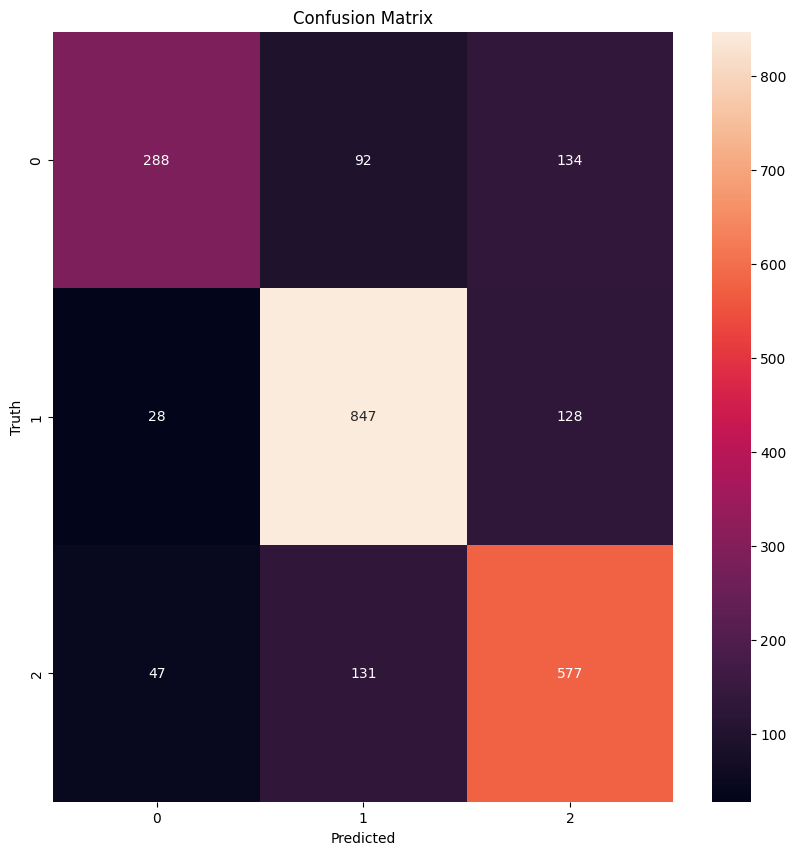

In [ ]:
cm = confusion_matrix(label , pred)
print(cm)
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Confusion Matrix")
plt.show()

The confusion matrix we generated provides insight into how well my model is performing across different classes. Here's an interpretation of the results:

1.  **Matrix Structure**The rows of the confusion matrix represent the true labels, and the columns represent the predicted labels. Each cell at (i,j)(_i_,_j_) indicates the number of instances where the true class is i_i_ and the predicted class is j_j_.
    
2.  **Class-by-Class Performance**Let's break down the performance for each class based on the confusion matrix values:
    
    *   **Class 0 (First Row)**
        
        *   Correctly classified: 288 instances.
            
        *   Misclassified as Class 1: 92 instances.
            
        *   Misclassified as Class 2: 134 instances.
            
    *   **Class 1 (Second Row)**
        
        *   Correctly classified: 847 instances.
            
        *   Misclassified as Class 0: 28 instances.
            
        *   Misclassified as Class 2: 128 instances.
            
    *   **Class 2 (Third Row)**
        
        *   Correctly classified: 577 instances.
            
        *   Misclassified as Class 0: 47 instances.
            
        *   Misclassified as Class 1: 131 instances.
            
3.  **Observations**
    
    *   **Class 1** is the best-performing class with 847 correct predictions and fewer misclassifications relative to other classes.
        
    *   **Class 0** and **Class 2** are more often confused with each other and with Class 1, suggesting that their feature representations may overlap or that the model struggles to distinguish between them under certain conditions.
        
4.  **Overall Accuracy and Misclassification Analysis**
    
    *   The model’s overall performance appears decent, especially given the correct classification counts.
        
    *   High misclassification counts for certain class pairs (e.g., Class 0 and Class 2) indicate areas where additional training data or targeted data augmentation may help.
        
5.  **Suggestions for Improvement**
    
    *   **Class Rebalancing:** Consider adjusting the dataset if certain classes are underrepresented, as imbalance can impact model performance.
        
    *   **Fine-tuning Model Parameters:** Experimenting with model hyperparameters or training for a few additional epochs might improve results.
        
    *   **Further Augmentation:** Techniques like targeted CutMix or Mixup for difficult classes could enhance model robustness.

## Preparing Datasets for Efficient Storage and Processing Using TFRecords

### Introduction

This section details the steps taken to convert training and validation datasets into TFRecord format for efficient storage and input pipeline processing. The TFRecord format allows for optimized data reading and parallelized processing in machine learning workflows, particularly with large datasets. Each step from dataset preparation to TFRecord serialization is described below.

### Step 1: Initializing the Training Data with Augmentation

The initial preparation of the dataset begins with applying a predefined augment\_layer function to each element in the training dataset. This layer performs data augmentation, enhancing the model’s ability to generalize by introducing variability into the data. Unlike previous configurations, prefetching is deliberately omitted in this initialization step to streamline the data pipeline, focusing on augmentation and further processing.

### Step 2: Unbatching the Data

After mapping the augmentation, both training and validation datasets undergo an unbatching process. In the original dataset, data is batched to improve efficiency during model training. However, for TFRecord conversion, each example needs to be handled individually. The unbatching process disassembles these batches, returning the dataset to a per-example format, which is required for TFRecord writing, ensuring each data point is saved independently.

### Step 3: Creating TFRecord Examples

The function create\_example is defined to convert each image-label pair into a TFRecord-compatible format. This function prepares the dataset for serialization by constructing each example as a Protocol Buffers message, which is compatible with TFRecord storage.

*   **Image Conversion**: The image data is encoded and stored as a bytes\_feature, which efficiently manages large binary data types, like image pixel data, by converting it into a raw byte string.
    
*   **Label Conversion**: The label is stored as an int64\_list, a feature optimized for numerical data types. This ensures that each label remains associated with its corresponding image.
    
*   **Example Structuring**: An Example is constructed by combining these two features (bytes\_feature for images and int64\_list for labels) within a structured format. Each Example is then serialized, creating a compact, TFRecord-ready format that is optimized for TensorFlow’s input pipeline.
    

### Step 4: Configuring Sharding for Efficient Storage and Retrieval

To optimize both storage and read access times, the dataset is divided into 10 shards. Sharding the dataset into multiple TFRecord files (defined by PATH = 'tfrecords/shard\_{:02d}.tfrecord') minimizes bottlenecks during data retrieval. This division allows parallel data loading and enables TensorFlow to access and process smaller, more manageable portions of data simultaneously.

In [ ]:
training_dataset_tfrecords = train_dataset.map(augment_layer,num_parallel_calls = tf.data.AUTOTUNE)
validation_dataset_tfrecords = val_dataset

In [ ]:
training_dataset_tfrecords = ( training_dataset_tfrecords
                              .unbatch()
                              )
validation_dataset_tfrecords = (
    validation_dataset_tfrecords
    .unbatch()
    )

In [ ]:
training_dataset_tfrecords

<_UnbatchDataset element_spec=(TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(3,), dtype=tf.float32, name=None))>

In [ ]:
validation_dataset_tfrecords

<_UnbatchDataset element_spec=(TensorSpec(shape=(256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(3,), dtype=tf.float32, name=None))>

In [ ]:
def create_example(image, label):

  bytes_feature = Feature(
      bytes_list=BytesList(value=[image]))

  int_feature = Feature(
      int64_list=Int64List(value=[label]))

  example = Example(
      features=Features(feature={
          'images': bytes_feature,
          'labels': int_feature,
      }))

  return example.SerializeToString()

In [ ]:
NUM_SHARDS = 10
PATH = 'tfrecords/shard_{:02d}.tfrecord'

## **Efficient Dataset Serialization Using TFRecords**

#### **Step 1: Encoding Images and Labels**

**Purpose**:The encode\_image function prepares images and labels for efficient storage in TFRecords format by converting them to a serialized format.

**Explanation**:

1.  **Image Conversion**:
    
    *   tf.image.convert\_image\_dtype converts the image data to uint8 format to reduce memory usage while retaining image quality. This step ensures compatibility with JPEG encoding.
        
    *   tf.io.encode\_jpeg compresses the image into a JPEG format, creating a byte-encoded representation, which is optimal for storage and retrieval.
        
2.  **Label Encoding**:
    
    *   tf.argmax(label) reduces multi-dimensional one-hot encoded labels into single scalar values, simplifying label storage.
        

**Result**:The dataset is transformed into a format suitable for writing as TFRecords.

#### **Step 2: Transforming the Dataset for Sharding**

**Purpose**:The encoded\_dataset is processed to divide the dataset into multiple shards for parallelism, efficiency, and scalability.

**Explanation**:

1.  **Sharding Logic**:
    
    *   The .shard function splits the dataset into NUM\_SHARDS equal parts, iteratively accessing the subset corresponding to the current shard\_number. This ensures balanced data distribution across shards.
        
    *   The as\_numpy\_iterator() converts the dataset to a NumPy-compatible iterator, enabling easy iteration and data processing.
        
2.  **Reason for Sharding**:
    
    *   Sharding is essential when handling large datasets, as it facilitates parallel access during training and reduces storage bottlenecks.
        

#### **Step 3: Writing to TFRecords**

**Purpose**:Serialize the sharded dataset into TFRecords format, which is TensorFlow’s efficient data storage format designed for large-scale machine learning workflows.

**Explanation**:

1.  **TFRecordWriter**:
    
    *   The tf.io.TFRecordWriter creates and manages the shard-specific TFRecords file at the specified path. The PATH.format(shard\_number) ensures that each shard has a unique file name.
        
2.  **Creating Serialized Examples**:
    
    *   The create\_example function (provided earlier) converts each image and label pair into a serialized TFRecord-compatible format (Example protocol buffer).
        
    *   For each shard, file\_writer.write(example) writes the serialized example into the corresponding shard file.
        

**Result**:The dataset is stored as a series of TFRecords shards, enabling efficient input/output operations during training, especially on distributed systems.

### **Significance of the Workflow**

This process exemplifies a complete pipeline for preparing datasets for scalable machine learning:

*   Optimized image and label encoding.
    
*   Efficient data partitioning into shards for parallelism.
    
*   Reliable serialization into TFRecords for seamless integration with TensorFlow workflows.
    

This methodology is crucial for handling large-scale datasets and ensures efficient storage and retrieval in training pipelines.

In [ ]:
def encode_image(image, label):
  image = tf.image.convert_image_dtype(image, dtype=tf.uint8)
  image = tf.io.encode_jpeg(image)
  return image,tf.argmax(label)

In [ ]:
encoded_dataset = (
  training_dataset_tfrecords
  .map(encode_image)
)

In [ ]:
for shard_number in range(NUM_SHARDS):

  sharded_dataset = (
      encoded_dataset
      .shard(NUM_SHARDS, shard_number)
      .as_numpy_iterator()
  )

  with tf.io.TFRecordWriter(PATH.format(shard_number)) as file_writer:
    for encoded_image, encoded_label in sharded_dataset:

      example = create_example(encoded_image, encoded_label)
      file_writer.write(example)

we can now save the files in the PATH in drive or any place we want

In [ ]:
tf.__version__

## **Reconstructing and Parsing TFRecords Dataset**

#### **1\. Reconstructing the Dataset from TFRecords**

This step initializes a dataset by reading serialized TFRecords files from the disk using TFRecordDataset. The filenames are dynamically generated to include specific shards, based on the number of shards used during the dataset splitting process.

*   **Purpose**: TFRecords are binary file formats used to store large datasets efficiently. They allow sequential reading, minimizing memory usage while enabling faster data input pipelines.
    
*   **Theory**: Reading TFRecords files reconstructs the serialized dataset, preparing it for further processing like parsing and batching. Using multiple shards allows parallelism, which is crucial for distributed systems or when datasets are stored in smaller, manageable file chunks.
    
*   **Efficiency**: Using TFRecords and reading only the relevant shards enhances data access speed and reduces I/O bottlenecks. This approach is particularly beneficial for cloud-based or large-scale machine learning pipelines.
    

#### **2\. Parsing Serialized TFRecords**

The dataset read from the TFRecords files consists of serialized examples that need to be parsed into structured and usable formats. A parsing function specifies the schema of the serialized data and decodes it into image-label pairs.

*   **Feature Description**:Each serialized example in the TFRecords contains features such as image data (stored as a string) and a corresponding label (stored as an integer). The FixedLenFeature function defines the type and shape of these features.
    
*   **Decoding Images**:Images are stored in JPEG format within the TFRecords. To use them for training, they are decoded into tensors and normalized to the desired data type. Normalization helps ensure consistent scaling, which is critical for deep learning models.
    
*   **Purpose**:The parsed dataset becomes ready for model training or evaluation by converting the raw binary data back into meaningful inputs (images) and outputs (labels).
    
*   **Scalability**:By parsing TFRecords on-the-fly, this approach avoids loading the entire dataset into memory, making it suitable for very large datasets.
    

#### **3\. Batching and Prefetching the Dataset**

Once parsed, the dataset is prepared for training by batching and prefetching.

*   **Batching**: Groups multiple data points into mini-batches. This operation is fundamental for efficient gradient descent training in deep learning.
    
*   **Prefetching**: Ensures that data loading and processing are overlapped with model training. By preloading the next batch while the current batch is being used, prefetching eliminates idle times in the pipeline, significantly improving overall performance.
    
*   **Purpose**: These optimizations leverage TensorFlow’s pipeline capabilities to maximize training efficiency, especially when working with large datasets stored in TFRecords format.
    

This entire workflow demonstrates a scalable and efficient approach to preparing datasets for machine learning pipelines, leveraging TFRecords for storage and TensorFlow's data pipeline optimizations for processing.

In [ ]:
recons_dataset = tf.data.TFRecordDataset(
    filenames =[PATH.format(p) for p in range(NUM_SHARDS-2)] )

In [ ]:
def parse_tfrecords(example):

    feature_description = {
          "images": tf.io.FixedLenFeature([], tf.string),
          "labels": tf.io.FixedLenFeature([], tf.int64),
      }

    example = tf.io.parse_single_example(example, feature_description)
    example["images"] = tf.image.convert_image_dtype(
        tf.io.decode_jpeg(
        example["images"], channels = 3), dtype = tf.float32)

    return example["images"], example["labels"]


In [ ]:
parsed_dataset = (
    recons_dataset
    .map(parse_tfrecords)
    .batch(CONFIGURATION["BATCH_SIZE"])
    .prefetch(tf.data.AUTOTUNE)
)


In [ ]:
parsed_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, None, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
for i in parsed_dataset.take(1):
  print(i)
  break

(<tf.Tensor: shape=(32, 256, 256, 3), dtype=float32, numpy=
array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]],




For training , we initialize the model , we have some changes to consider :


## **Model Initialization and Training Workflow**

#### **1\. Defining the Loss Function**

The loss function, **Sparse Categorical Crossentropy**, is used for multi-class classification problems where labels are represented as integers rather than one-hot encoded vectors.

*   **Theory**: This loss function calculates the difference between the predicted probability distribution (output from the model) and the true distribution (ground truth labels).
    
*   **Purpose**: Minimizing this loss ensures that the predicted probabilities align with the correct class, improving model performance. Sparse categorical crossentropy is computationally efficient for integer labels.
    

#### **2\. Specifying Evaluation Metrics**

The metrics include **Sparse Categorical Accuracy**, which measures how often the predicted class matches the true class.

*   **Theory**: Accuracy is computed as the ratio of correct predictions to the total number of predictions.
    
*   **Purpose**: Providing metrics like accuracy allows monitoring of model performance during training and evaluation. Sparse metrics are compatible with integer labels, ensuring alignment with the chosen loss function.
    

#### **3\. Compiling the Model**

Compiling prepares the model for training by configuring the optimizer, loss function, and metrics.

*   **Optimizer**: The **Adam optimizer** combines the benefits of Adaptive Gradient Algorithm (AdaGrad) and Root Mean Square Propagation (RMSProp), making it efficient for non-convex optimization problems. The learning rate is dynamically controlled by the configuration.
    
*   **Purpose**: The optimizer adjusts the model weights iteratively to minimize the loss function, improving predictions over time.
    
*   **Configuration**: The specified learning rate balances between rapid convergence and stable optimization.
    

#### **4\. Training the Model**

The model is trained using the fit method, with several critical configurations:

*   **Dataset**: The parsed\_dataset, which is batched, parsed, and preprocessed, is provided for training.
    
*   **Epochs**: The number of epochs, determined by the configuration, controls how many complete passes are made over the dataset. Each epoch allows the model to learn patterns in the data iteratively.
    
*   **Verbose**: Setting verbose=1 enables progress logs, showing details like epoch numbers, training loss, and accuracy metrics during the training process.

In [ ]:
loss_function = SparseCategoricalCrossentropy()

metrics = [SparseCategoricalAccuracy(name = "accuracy")]

lenet_model.compile(
    optimizer = Adam(learning_rate = CONFIGURATION["LEARNING_RATE"]),
    loss = loss_function,
    metrics = metrics,)

In [ ]:
history = lenet_model.fit(
    parsed_dataset,
    epochs = CONFIGURATION["N_EPOCHS"],
    verbose = 1,
    )

Epoch 1/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.4282 - loss: 1.2242
Epoch 2/20
  5/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.5029 - loss: 0.9696

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.5770 - loss: 0.8786
Epoch 3/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.6541 - loss: 0.7138
Epoch 4/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.6838 - loss: 0.6673
Epoch 5/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.6819 - loss: 0.6382
Epoch 6/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.6930 - loss: 0.6314
Epoch 7/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7035 - loss: 0.6085
Epoch 8/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.6977 - loss: 0.6013
Epoch 9/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.7021 - loss: 0.5979
Epoch 10/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.7100 - loss: 0.5885
Epoch 11/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.7103 - loss: 0.5848
Epoch 12/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.7063 - loss: 0.5831
Epoch 13/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/st

### **Conclusion About TFRecords**

#### **What Are TFRecords?**

TFRecords are a compact, efficient, and binary serialization format designed for storing large datasets in TensorFlow. They allow for high-speed input/output operations and reduce storage space compared to raw data formats. TFRecords are particularly advantageous for large-scale deep learning projects where data needs to be read and processed efficiently.

#### **Where to Save .tfrecord Files?**

1.  **Local Storage**: For smaller projects or prototyping, save .tfrecord files on local disks, preferably in a well-structured directory (e.g., data/tfrecords/) to keep the project organized.
    
2.  **Remote Storage**: In production or large-scale training, consider saving .tfrecord files in cloud storage solutions like **Google Cloud Storage**, **AWS S3**, or **Azure Blob Storage** for scalability and easier access by distributed training systems.
    
3.  **Sharding**: When saving, split the data into multiple shards (e.g., shard\_{:02d}.tfrecord) to enable parallel data loading, which speeds up training on systems with multiple CPUs or GPUs.
    

#### **What to Do With TFRecords?**

1.  **Parsing and Preprocessing**:
    
    *   Use functions like tf.data.TFRecordDataset to load .tfrecord files.
        
    *   Apply parsing logic (e.g., tf.io.parse\_single\_example) to extract and decode features.
        
2.  **Efficient Pipeline Creation**:
    
    *   Integrate TFRecords into the **tf.data API** for seamless preprocessing (e.g., batching, shuffling, and augmentation).
        
    *   Prefetch and parallelize operations for optimal resource utilization.
        
3.  **Distributed Training**:
    
    *   TFRecords support distributed computing by enabling parallel read/write operations. This makes them ideal for training models on multi-GPU or TPU setups.
        
4.  **Reproducibility**:
    
    *   By storing preprocessed datasets in .tfrecord files, you ensure consistency in the data pipeline, which is crucial for reproducibility in machine learning experiments.
        

#### **Key Benefits of TFRecords**

*   **Efficiency**: Fast I/O and reduced disk usage due to binary encoding.
    
*   **Scalability**: Seamless integration with distributed systems and large datasets.
    
*   **Flexibility**: Compatible with various data types (images, labels, text, etc.).
    
*   **Consistency**: Ensures uniform data input for training and evaluation.
    

#### **Conclusion**

TFRecords are a cornerstone of efficient and scalable data pipelines in TensorFlow. By saving them in an organized manner, leveraging cloud storage when needed, and integrating them into tf.data workflows, you can optimize model training and ensure reproducibility. Proper utilization of TFRecords enhances both performance and reliability, making them a best practice for modern machine learning projects.

## **Advantages Despite Parsing Back the Original Data**
parsing TFRecords essentially converts the data back into its original usable form (e.g., images and labels in TensorFlow tensor format). However, the process offers several advantages over directly using the raw data, even though the content appears similar after parsing. Here's why it's beneficial:

### **Advantages Despite Parsing Back the Original Data**

#### 1\. **Storage Efficiency**

*   TFRecords store data in a **compact binary format**, significantly reducing storage space compared to raw data like images or CSV files.
    
*   This compactness also speeds up data loading from storage, especially for large datasets.
    

#### 2\. **Optimized Data Loading for Training**

*   TFRecords are designed to work seamlessly with TensorFlow's tf.data API, which provides tools for efficient data pipelines, including:
    
    *   **Shuffling**: Ensures better model generalization by randomizing data order.
        
    *   **Batching**: Combines multiple samples into batches for training.
        
    *   **Prefetching**: Overlaps data preparation with model training, reducing idle time for the GPU or TPU.
        
*   These features collectively improve training efficiency.
    

#### 3\. **Uniform and Scalable Data Handling**

*   TFRecords can encode **heterogeneous datasets** (e.g., images, text, and labels in one record), making it easier to handle complex datasets in a single format.
    
*   They simplify training on **distributed systems** by splitting data into shards, allowing parallel loading and processing.
    

#### 4\. **Decoupling Data Preparation**

*   By converting raw data into TFRecords, you separate the **data preparation** step from the **training pipeline**. This enables:
    
    *   Reuse of the same preprocessed data across multiple experiments without reapplying augmentations or preprocessing each time.
        
    *   Consistent and reproducible pipelines where the dataset format remains fixed.
        

#### 5\. **Avoids Loading Overhead**

*   Parsing and streaming data from TFRecords avoids the overhead of loading large datasets entirely into memory.
    
*   This is particularly useful for training on systems with limited memory (e.g., GPUs) or cloud environments where data is stored remotely.
    

### **Key Difference: Raw Data vs. Parsed TFRecords**

*   **Raw Data**: Typically stored in formats like images (JPEG/PNG) or CSVs. These formats are inefficient for direct training pipelines because they lack compatibility with high-performance data loading APIs.
    
*   **Parsed TFRecords**: Data is serialized for compactness and efficiency, then deserialized (parsed) for use. The intermediate TFRecord step enables all the performance optimizations of TensorFlow's tf.data API.
    

### **Conclusion**

While parsing TFRecords returns the data to a form similar to the original, the benefits lie in **performance**, **scalability**, and **reproducibility**. The transformation to TFRecords optimizes data handling for large-scale machine learning workflows, especially when dealing with distributed systems or cloud-based training environments.